### TUGAS 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

def train_and_evaluate_regression_model(learning_rate, X_train, y_train, X_test, y_test):
    print(f"\n--- Training with Learning Rate: {learning_rate} ---")

    # Model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])

    # Kompilasi dengan optimizer Adam dan learning_rate yang ditentukan
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    # Latih model
    history = model.fit(X_train, y_train, epochs=100, verbose=0) # verbose=0 untuk mengurangi output

    # Evaluasi
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"Final Loss (MSE) with LR {learning_rate}: {loss:.4f}")
    return loss

# --- Bandingkan hasil dengan learning rate yang berbeda ---

# Learning rate asli (default Adam = 0.001)
original_lr = 0.001
original_loss = train_and_evaluate_regression_model(original_lr, X_train, y_train, X_test, y_test)

# Learning rate yang diubah (misalnya lebih besar)
modified_lr_higher = 0.01
modified_loss_higher = train_and_evaluate_regression_model(modified_lr_higher, X_train, y_train, X_test, y_test)

# Learning rate yang diubah (misalnya lebih kecil)
modified_lr_lower = 0.0001
modified_loss_lower = train_and_evaluate_regression_model(modified_lr_lower, X_train, y_train, X_test, y_test)

print("\n--- Perbandingan Final Losses (MSE) ---")
print(f"LR {original_lr}:      {original_loss:.4f}")
print(f"LR {modified_lr_higher}: {modified_loss_higher:.4f}")
print(f"LR {modified_lr_lower}:  {modified_loss_lower:.4f}")

# Mencari learning rate terbaik
best_loss = min(original_loss, modified_loss_higher, modified_loss_lower)
if best_loss == original_loss:
    print(f"Learning rate {original_lr} memberikan loss terendah.")
elif best_loss == modified_loss_higher:
    print(f"Learning rate {modified_lr_higher} memberikan loss terendah.")
else:
    print(f"Learning rate {modified_lr_lower} memberikan loss terendah.")



--- Training with Learning Rate: 0.001 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Final Loss (MSE) with LR 0.001: 0.8964

--- Training with Learning Rate: 0.01 ---
Final Loss (MSE) with LR 0.01: 0.0089

--- Training with Learning Rate: 0.0001 ---
Final Loss (MSE) with LR 0.0001: 0.6612

--- Perbandingan Final Losses (MSE) ---
LR 0.001:      0.8964
LR 0.01: 0.0089
LR 0.0001:  0.6612
Learning rate 0.01 memberikan loss terendah.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


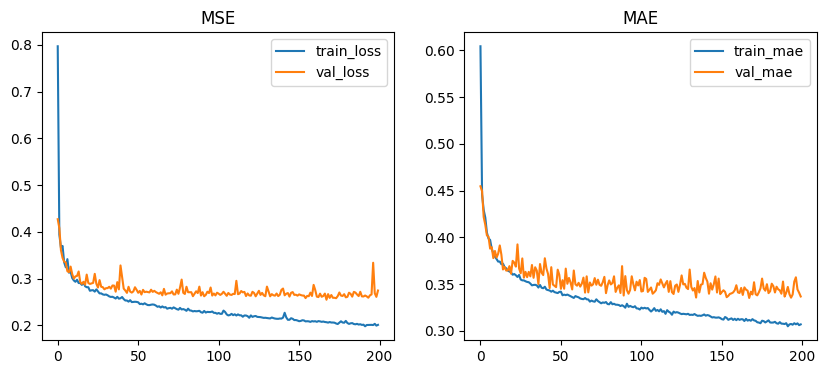

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 0.52406235467292


In [ ]:
# MLP regresi (Keras)
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.datasets import load_boston # Removed due to ethical concerns
from sklearn.datasets import fetch_california_housing # Use California Housing dataset instead
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Load
# data = load_boston()
# X = data.data; y = data.target
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 2. Preprocess
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)

# 3. Build model
model = Sequential([
Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
Dense(32, activation='relu'),
Dense(1)
])
model.compile(optimizer=Adam(1e-3), loss='mse', metrics=['mae'])

# 4. Train
h = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, verbose=0)

# 5. Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(h.history['loss'], label='train_loss'); plt.plot(h.history['val_loss'], label='val_loss'); plt.legend(); plt.title('MSE')
plt.subplot(1,2,2); plt.plot(h.history['mae'], label='train_mae'); plt.plot(h.history['val_mae'], label='val_mae'); plt.legend(); plt.title('MAE')
plt.show()

from sklearn.metrics import mean_squared_error
pred = model.predict(X_val)
print('RMSE:', np.sqrt(mean_squared_error(y_val, pred)))